# Battle of the Neighborhoods

## 1. Introduction

Starting a business is often fraught with challenges, with many business decisions to make in order to optimize profits. A small business owner whose business involves shop fronts, the location of the shop would be of utmost importance to meet the objective of catering to the target audience as well as maximizing interest. A few offhand examples of mismatches would be not opening a cafe in an area with many cafes for too much competition or opening a bar in a school area.  

In this project, we would be analyzing neighborhoods in Los Angeles for the benefit of potential business owners. The findings would definitely help to narrow down the possible areas in which they can potentially optimize foot traffic to their businesses. Recommendations as to which area/cluster the potential business should be opened in would have to depend on the type of business (apparel, casual dining, fine dining etc.) and the targeted audience. 

## 2. Description of Data

The data required for our purpose would be:
- List of LA neighbourhoods and their respective geographical coordinates
- Venues data for the places of interest in each respective neighborhood

### LA Neighborhoods 
For Los Angeles (LA), there are many regions, each containing a different number of neighborhoods. As data for the regions, neighborhoods and their respective zip codes are scattered, reference from various sources are made in order to process the data. 

To obtain the zipcodes contained in each region, we will be referencing: https://www.usmapguide.com/california/los-angeles-zip-code-map/.

To obtain which neighborhood each zipcode belongs to, we will be referencing: http://www.laalmanac.com/communications/cm02_communities.php

Our data will be sorted as such: regions, neighborhoods, postal code, latitude, longitude.

### Geographical Co-ordinates
To obtain the geographical co-ordinates, we would be using the list of regions and neighborhoods previously processed and running it through arcgis to obtain the respective latitude and longitude values. These geographical coordinates are used to run through foursquare for the venue data as well as for used in plotting the visualization in folium.

### Venues Data (foursquare)
The places of interests in each neighborhood will be parsed by calling the foursquare API. Data provided by foursquare would be based on a specified radius from the provided longitude and latitude, where the venue name, type(eg. coffee shops, Gym etc.), geographical co-ordinates can be fetched. Foursquare can also provide menus, ratings and reviews; however for the purpose of the purpose of this project, only the data mentioned before would be utilized.

The foursquare API is able to fetch venue data up to a certain radius of the location determined; in this case, it will be a fixed latitude and longitude of the neighborhood as determined by arcgis.

## 3. Methodology

The main tools we will be using for the purpose of this project would be:
- folium, for visualizing
- geopy/arcgis, for geographical coordinates
- BeautifulSoup, for parsing of html data
- scikitlearn, for Kmeans modeling

The data was taken from the 2 websites mentioned above in the 'Data' sections. The data are from different sources, put up for different purposes; for general information and the other for postage purposes. The information for LA of the exact neighborhoods and the regions they belong to is not readily avaiable; for the purpose of the project, the data used would suffice.

### Data Collection
First, BeautifulSoup was used to parse the html of the websites we reference. Upon visual inspection of both websites, they are structured differently. We use the inspect element function of our browser to identify which part of the code is the information we need at in order to isolate them.

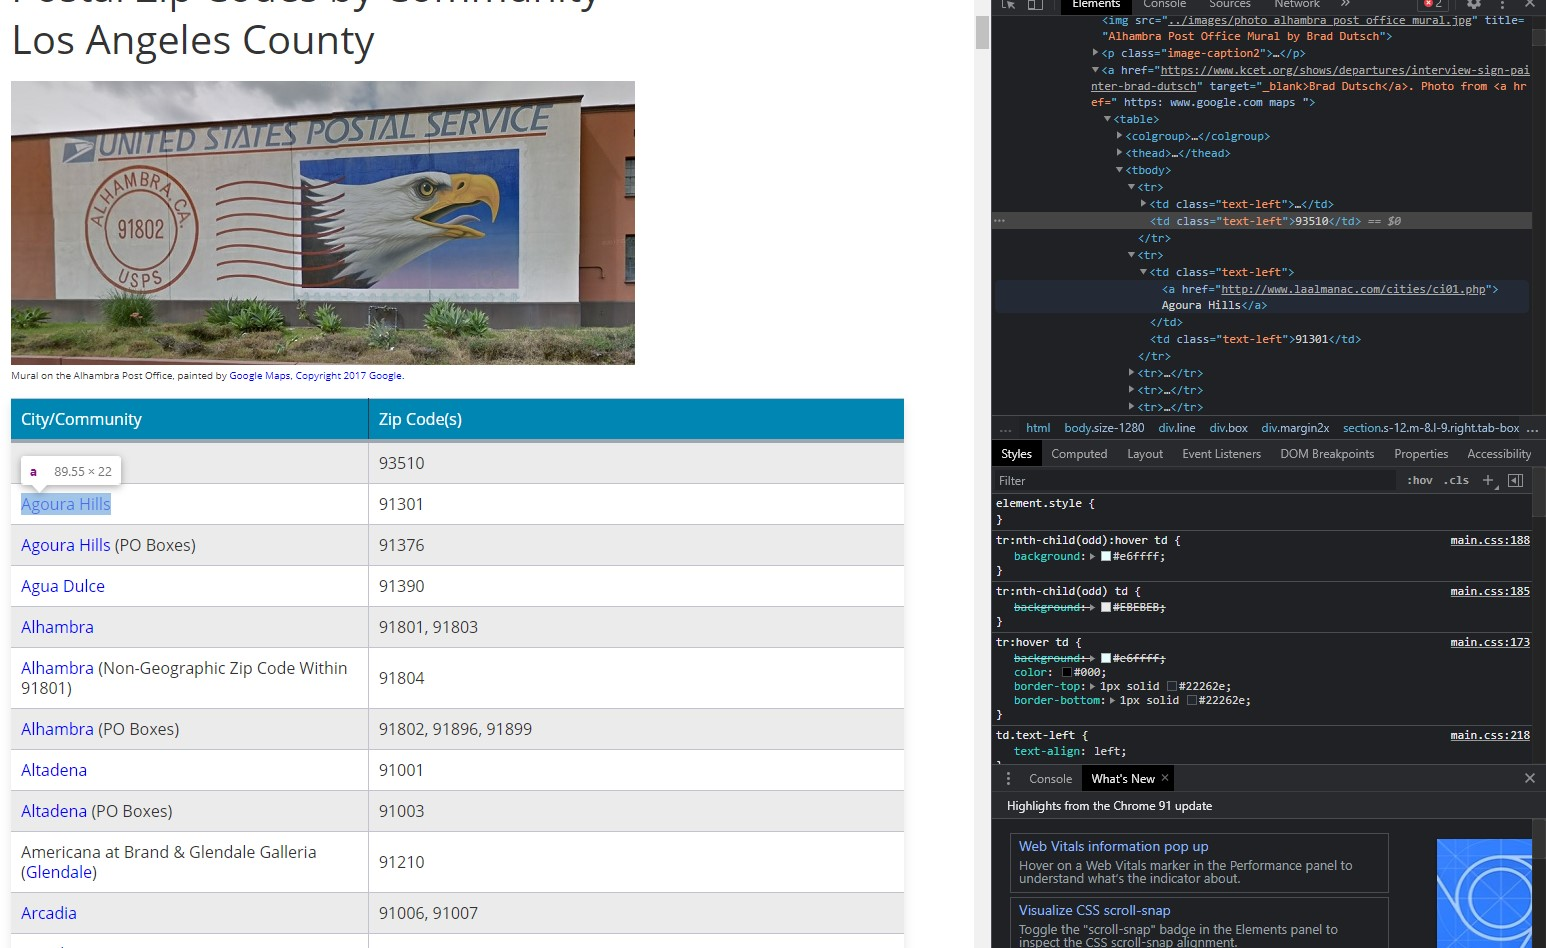

This process is done for both websites and cleaned up to form respective dataframes of their own. The format of both websites are different so different methods are used. Neighborhood-Zipcodes were contained in a table whereas Regions-Zipcodes were contained in text following headers. We end up with the dataset to be analysed after everything is done.

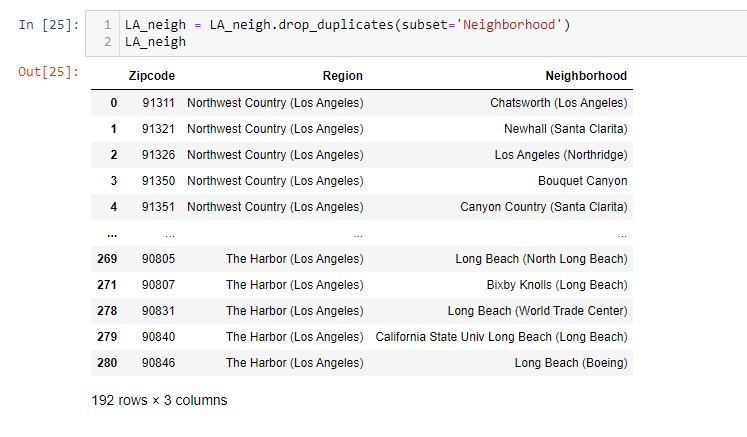

### Geographical Coordinates

With the dataframe containing the zipcodes and its respective neighborhood and region, we need to obtain the latitude and longitude values so that it can be easily passed to the foursquare API later on.

We use the arcgis library for this purpose. We begin by installing the library and defining the function to fetch the latitude/longitude values:
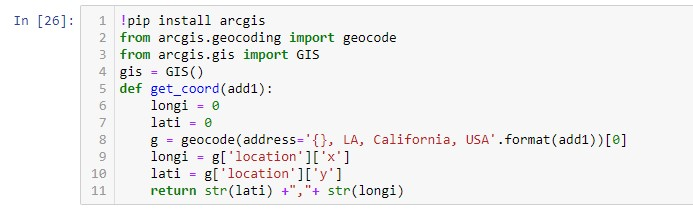

We then pass the function for every value of zipcodes in a for loop.
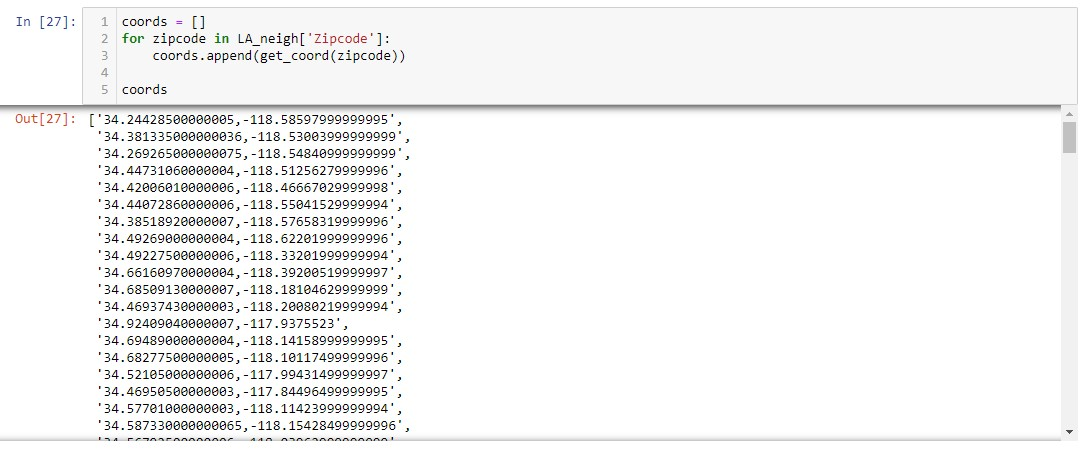

With our geographical coordinates in a list, we do some data processing to merge and clean it up in a format we want to form our dataframe 'LA_neigh'.
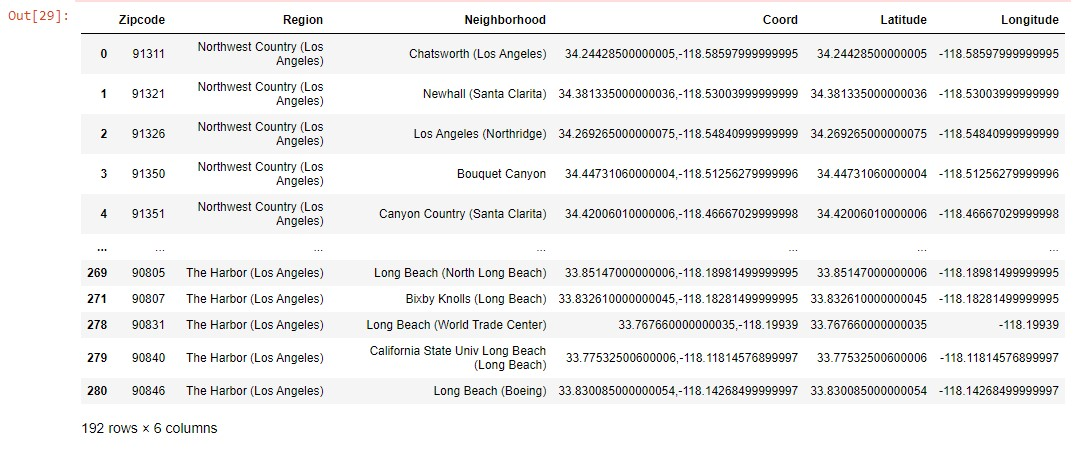

### Visualisation of the Neighborhood

To aid our understanding as well as to confirm that we have gotten coordinates around the map, we map it with folium to visualise what our data looks like.
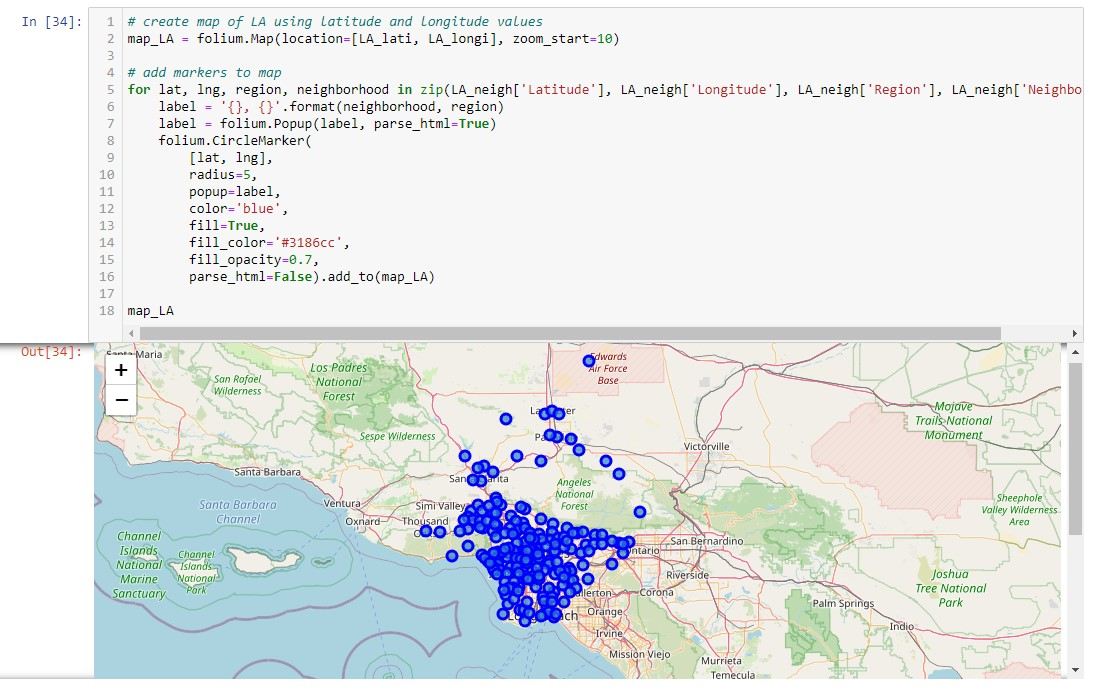

### Venues Data

For our analysis of neighborhoods, we pass our addresses (zipcodes) into foursquare and it will return us the places of interest around the point; including the name and venue category. Below is the callback script and the function to isolate the category types:

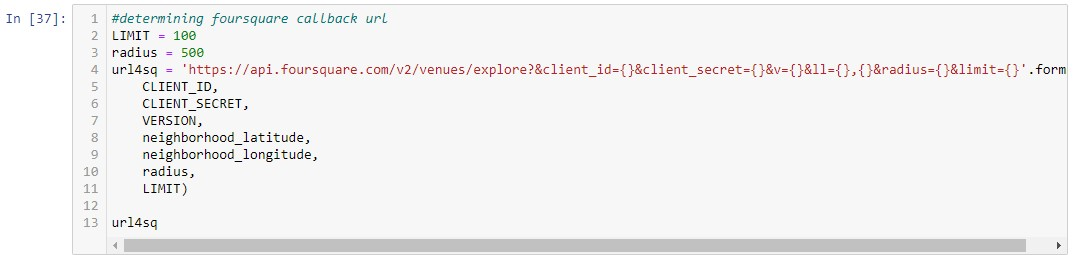


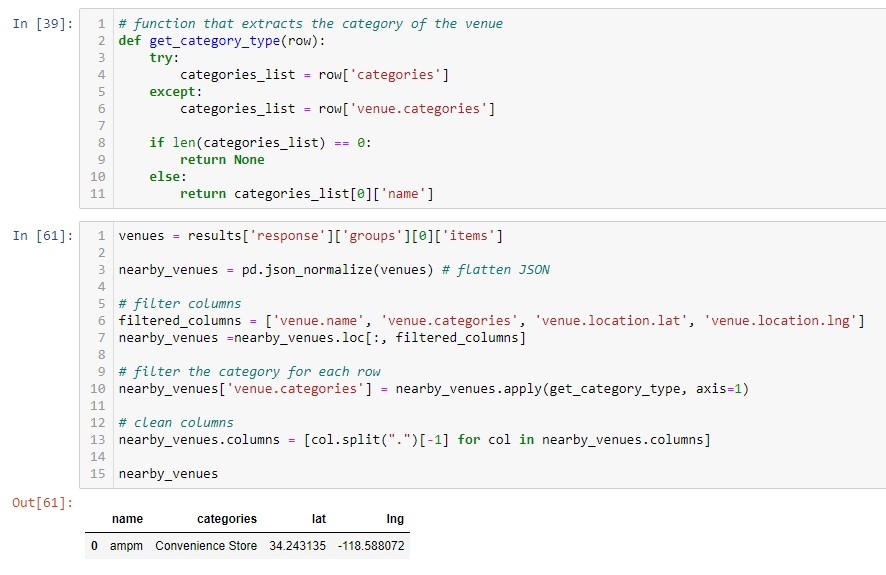

We apply it to every zipcode and come up with a dataframe like this:
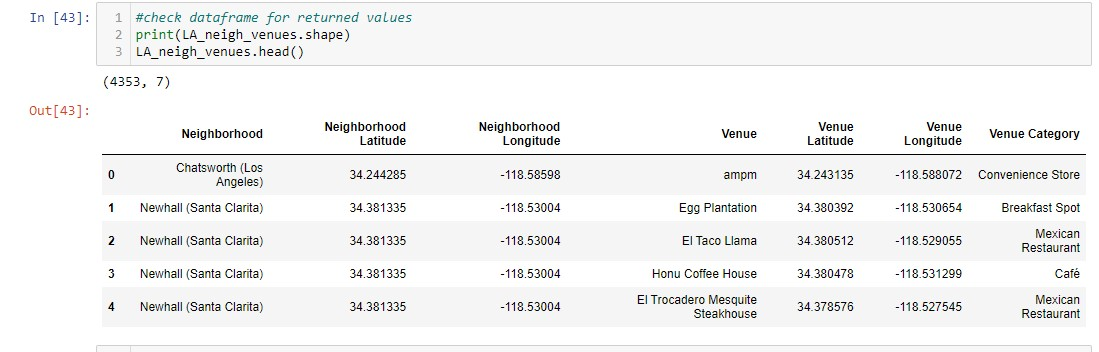

With 4353 venues fetched, the amount of data is sufficient for the scope of this project. As part of exploratory data analysis, we tidy and format our data in different ways to obtain certain statistics about what we have gathered.

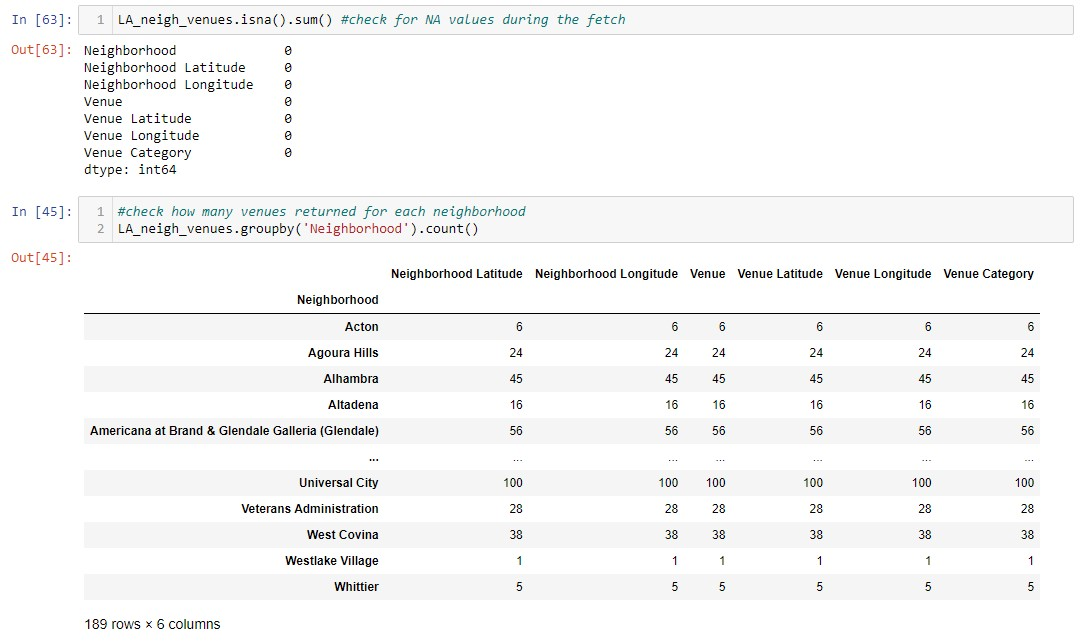

From the above screenshot, we can see that there is an imbalance of data for different neighborhoods; some neighborhoods fetching as much as 100 venues while some only fetches 1 venue. This imbalance would definitely affect our results later but this imbalance is to be expected as well due to the nature of the data; whereby some neighborhoods closer to the city centre would definitely have more places of interest as compared to somewhere in the suburbs. Also, foursquare data is user supported and thus the number of users/population in the area could also affect this. 

We then perform one-hot encoding for each venue category and its respective neighborhood so that we are able to do clustering. We are largely interested in the top 10 most common venues in each neighborhood as this can tell us what kind of neighborhood it is; eg. A chinese majority neighborhood like Chinatown would likely have more chinese restaurants. to achieve this, we utilize the one-hot encoding and find the mean of each venue.

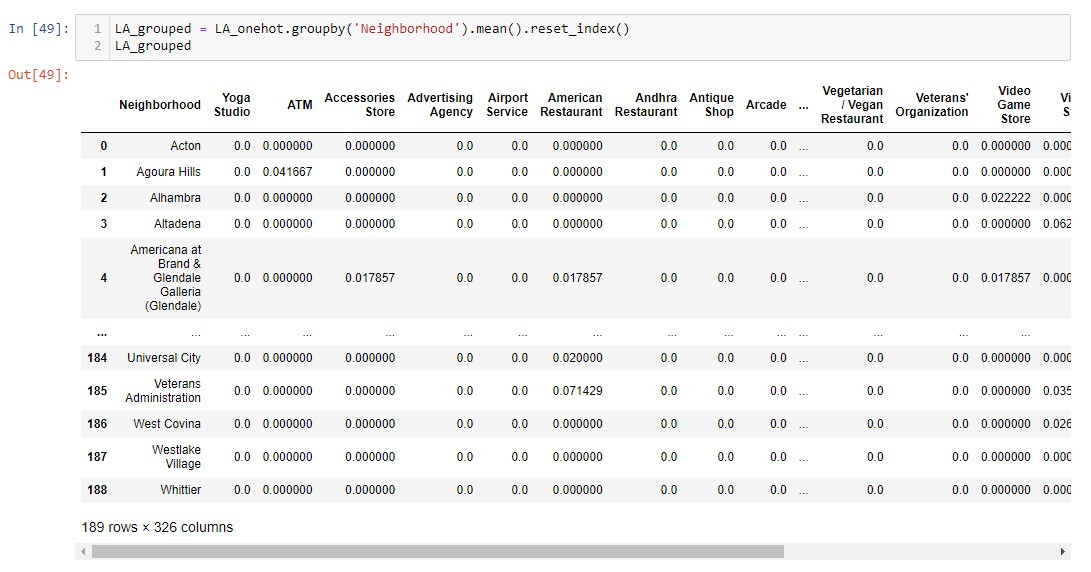

We visualise some of the data:
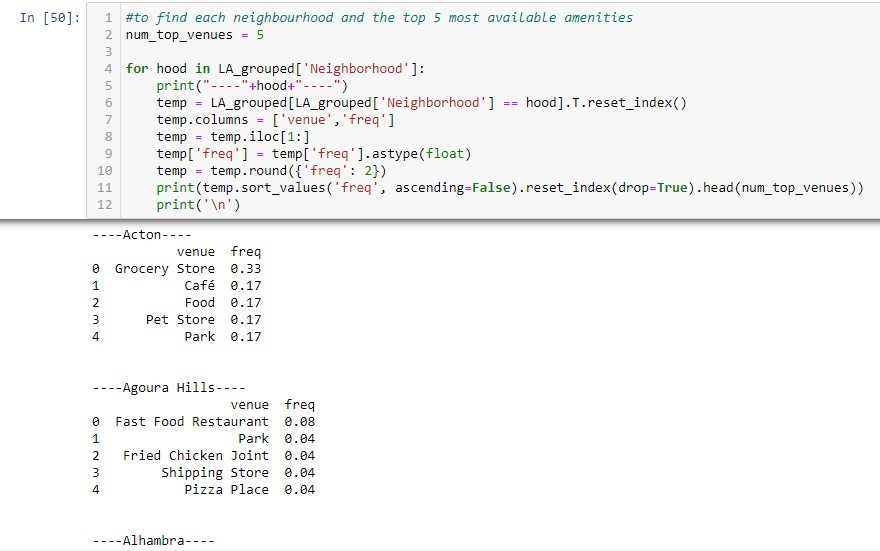

We find the top 10 venues via mean for each neighborhood and place them into a dataframe.
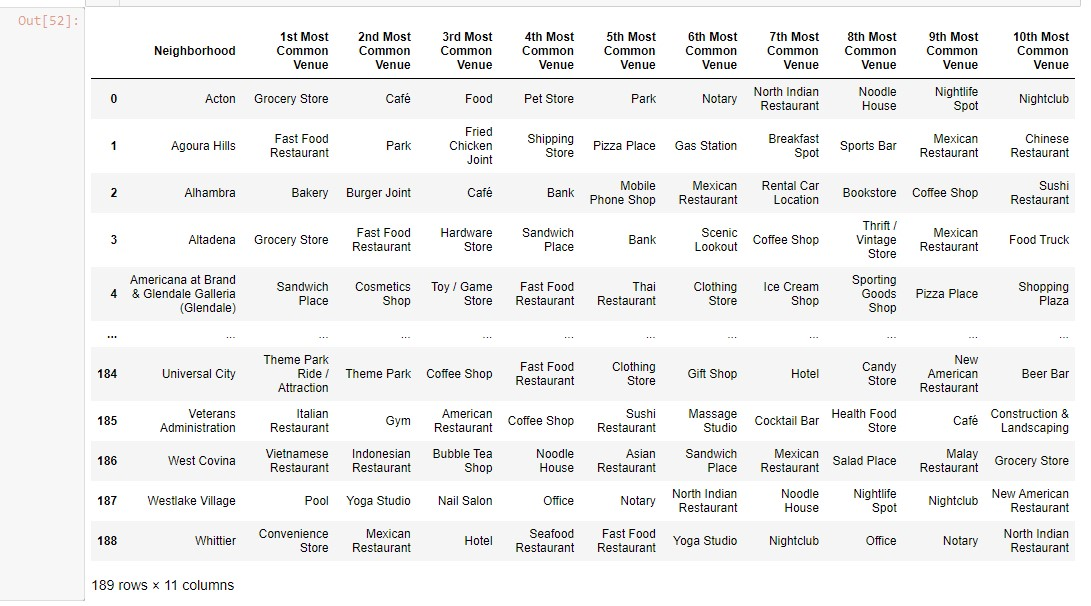

### K-means Clustering

The purpose of the project is to group similar neighborhoods together in LA so that we may find a prospective 'right' neighborhood for a certain type of business or developer depending on their needs. to achieve this, we would like to group neighborhoods with a similar profile together so that the end-user can choose any neighborhood in a cluster based on other factors such as rent pricing and still be able to have equal or similar success. 
With this in mind, utilizing K-means clustering seems to be an appropriate tool to use; we do not have training data so this is all the more useful as an unsupervised learning algorithm.

In K-means clustering, picking the number of clusters is of utmost importance, as this would affect our clustering accuracy. Having 2 clusters too close to each other is inaccurate clustering and would affect the results. To find our best k, silhouette scoring is used. This accesses how close each cluster is to each other by euclidean distance. it ranges from -1 to 1, 1 being clusters are clearly distinguished and -1 being clusters are assigned in the wrong way/too close.

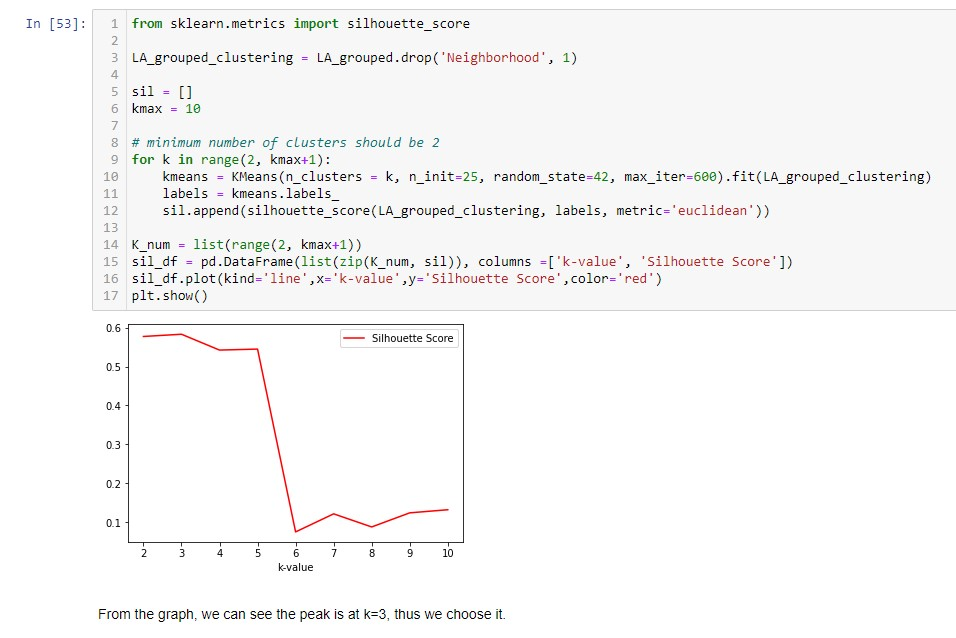

We carry out the K-means with 3 clusters and find out our cluster labels for each neighborhood as well as visualise them again in folium.

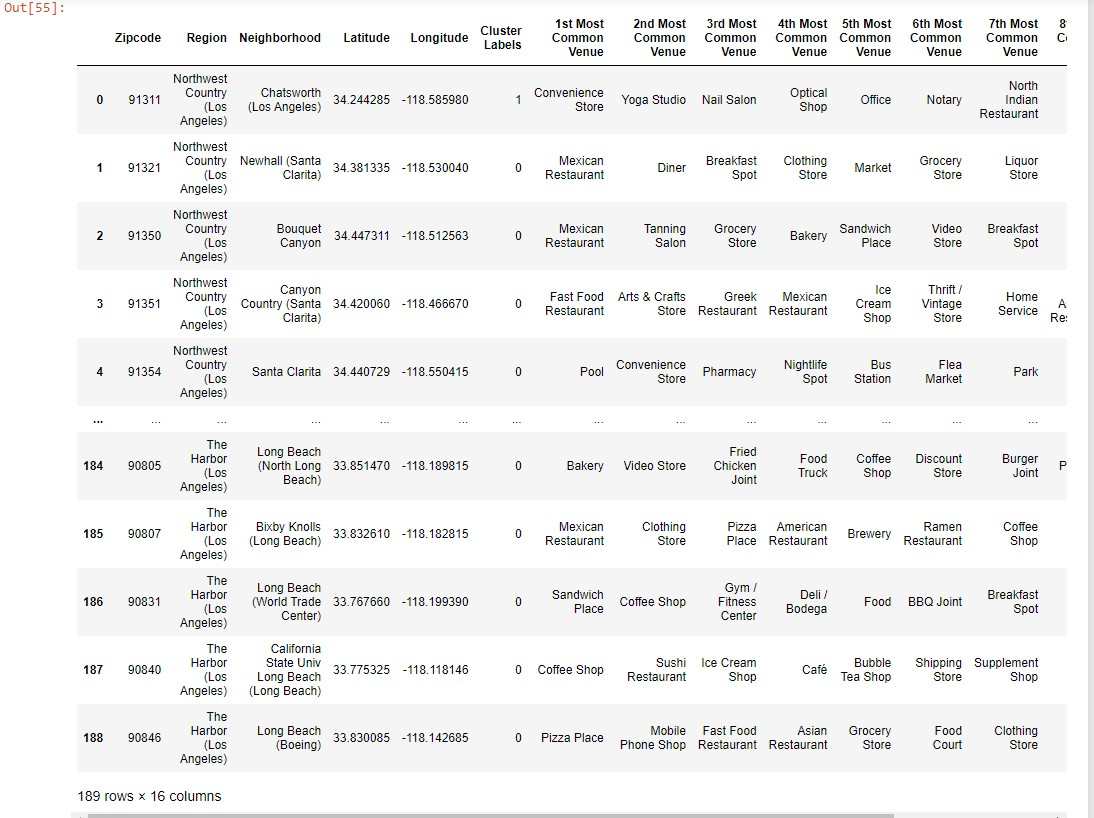


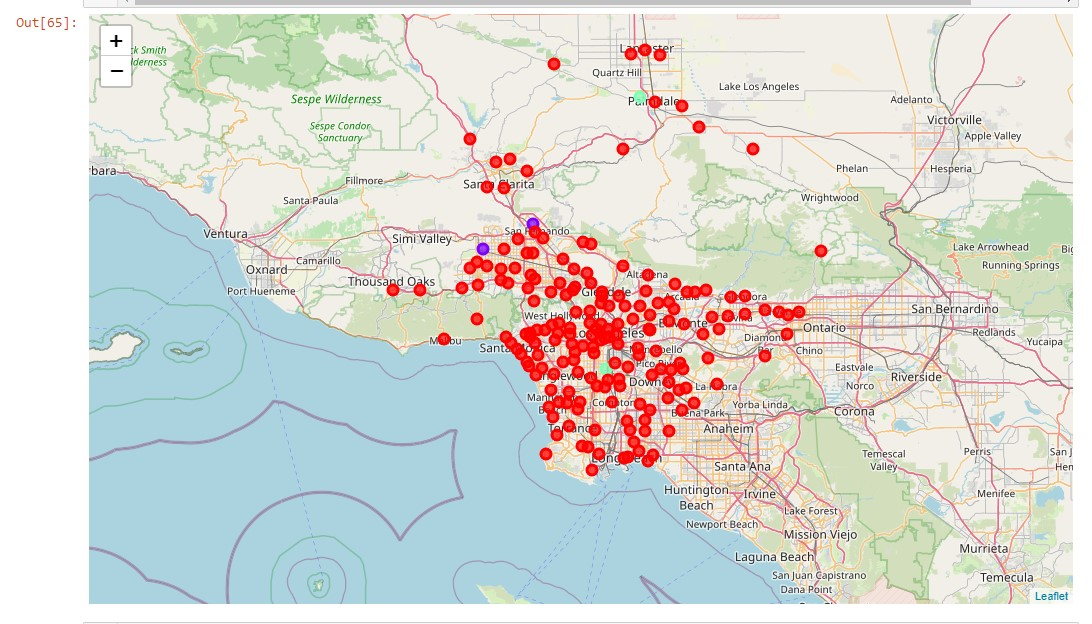

## Results

For the K-means clustering done, we have clustered the neighborhoods into 3 clusters.

### Cluster 1
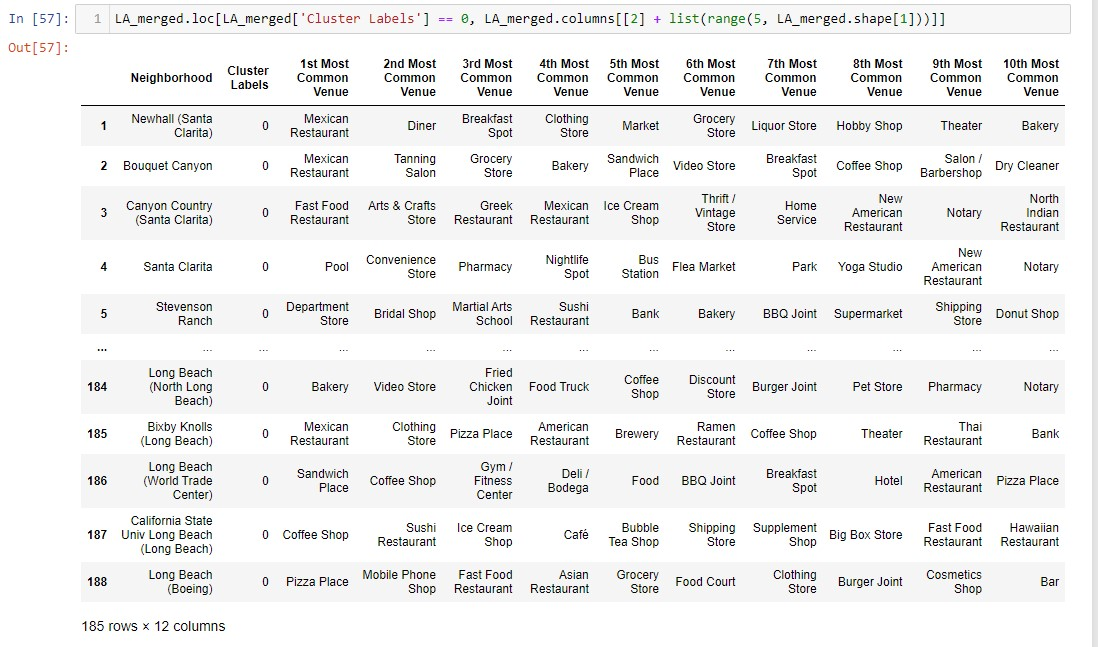

### Cluster 2
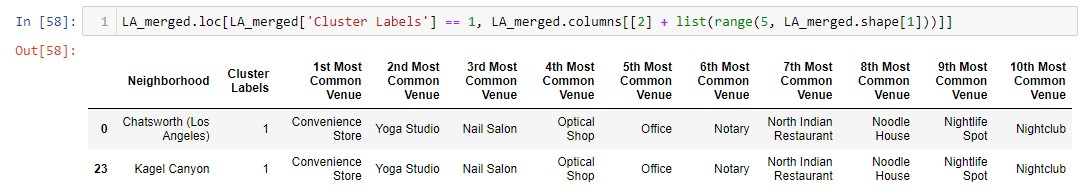

### Cluster 3
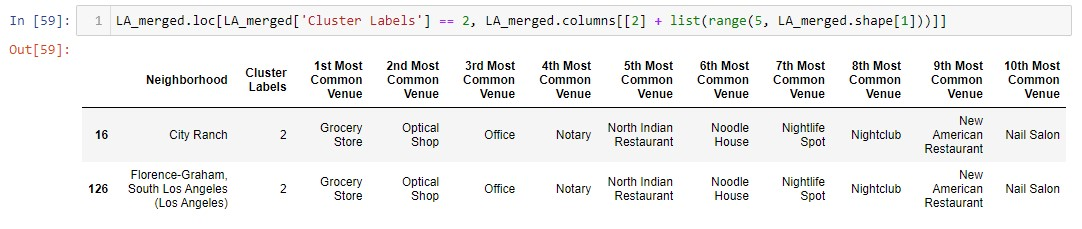

## Discussion

It is noted that the clusters are rather imbalanced, whereby cluster 1 has 185 items and Cluster 2 and 3 only have 2 each. In clusters 2 and 3, we can see that the clustering has not failed in the sense that they are similar/same for the top 10 venues and thus can be said to be similar.
For recommendations to use this clustering, perhaps someone who aims to open grocery or convenience stores in general should avoid Cluster 2 and 3 neighborhoods as grocery stores sell common items and over-competition may not be wanted in order for the business to thrive. 

Is it noted that with this clustering, it may be less helpful that expected as LA is a bustling city which has many amenities close to each other. To work around this characteristic of the area of discussion, there can be a few things that may be done. 

Further improvements that could be done down the road would be to reduce the distance in which foursquare fetches the venues from as perhaps some data from the neighborhoods have overlapped with each other due to the radius we have chosen.

There also may be too many venue categories that are too similar to each other. During the phase of venue collection, there were 326 venue categories collected. Perhaps some grouping of largely similar categories can be placed together; eg. 'Nightlife Spot' and 'Nightclub' can be one category; 'Supermarket' and 'Grocery Store' could also be placed together.

Another geo-data source for venues other than foursquare could also be used for possibly better data as well.

## Conclusion

LA is a bustling city with many different types of people as well as all sorts of amenities. The purpose of this project has been met in the sense that we got a preliminary feel of what LA is like and how the results can further be refined if to be continued for actual business use. 